In [1]:
import sys
import time
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

In [2]:
DCT = pd.read_excel("Raw_Results/RESULTS_IEEE30_ClassifiersTest_Imbalanced_DCT.xlsx")
GNB = pd.read_excel("Raw_Results/RESULTS_IEEE30_ClassifiersTest_Imbalanced_GNB.xlsx")
KNN = pd.read_excel("Raw_Results/RESULTS_IEEE30_ClassifiersTest_Imbalanced_KNN.xlsx")

In [3]:
imbalanceRange = np.arange(0.1,1.0,0.1)
print(imbalanceRange)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [4]:
DCT = []
GNB = []
KNN = []
MM = []

for i in imbalanceRange:
    DCT.append( pd.read_excel("Raw_Results/RESULTS_IEEE30_ClassifiersTest_Imbalanced_DCT.xlsx", sheet_name = "Imb {}".format(i)) )
    GNB.append( pd.read_excel("Raw_Results/RESULTS_IEEE30_ClassifiersTest_Imbalanced_GNB.xlsx", sheet_name = "Imb {}".format(i)) )
    KNN.append( pd.read_excel("Raw_Results/RESULTS_IEEE30_ClassifiersTest_Imbalanced_KNN.xlsx", sheet_name = "Imb {}".format(i)) )
    MM.append ( pd.read_excel("Raw_Results/RESULTS_IEEE30_MainModels_Imbalanced_100Epochs.xlsx", sheet_name = "Imb {}".format(i)) )

In [5]:
DCT[0].head()

,Unnamed: 0,Sparsity,Accuracy,F1 score,Precision,Recall,False Positive Rate
0,0,0.1,0.7485,0.776742,0.698324,0.875,0.378
1,1,0.2,0.9515,0.949767,0.984962,0.917,0.014
2,2,0.3,0.5000,0.665552,0.500000,0.995,0.995
3,3,0.4,0.4995,0.665329,0.499749,0.995,0.996
4,4,0.5,0.5820,0.702067,0.545404,0.985,0.821


In [6]:
d1 = DCT[0]
d1['Accuracy']

0    0.7485
1    0.9515
2    0.5000
3    0.4995
4    0.5820
5    0.9825
6    0.9820
7    0.9725
8    0.8105
9    0.9720
Name: Accuracy, dtype: float64

In [7]:
dct_acc = []
gnb_acc = []
knn_acc = []
ann_acc = []
gdnn_acc = []

for i in range(9):
    dct = DCT[i]
    gnb = GNB[i]
    knn = KNN[i]
    ann = MM[i]
    
    dct_acc.append( np.mean(dct['Accuracy']) )
    gnb_acc.append( np.mean(gnb['Accuracy']) )
    knn_acc.append( np.mean(knn['Accuracy']) )
    ann_acc.append( np.mean(ann['Model 1'])  ) 
    gdnn_acc.append( np.mean(ann['Model 7'])  )

In [8]:
print(dct_acc)
print(gnb_acc)
print(knn_acc)
print(ann_acc)
print(gdnn_acc)

[0.8001000000000001, 0.7923, 0.8006, 0.80335, 0.78, 0.7243499999999999, 0.6685, 0.67655, 0.6409]
[0.8972000000000001, 0.91295, 0.9079, 0.906, 0.89955, 0.8930999999999999, 0.8855500000000001, 0.8805999999999999, 0.8756499999999999]
[0.5, 0.5, 0.5, 0.5001, 0.50035, 0.5014000000000001, 0.5044, 0.5089499999999999, 0.5138499999999999]
[0.5, 0.5807999968528748, 0.851199996471405, 0.8960500001907349, 0.9095499992370606, 0.8857000052928925, 0.9351499915122986, 0.9369499921798706, 0.9375999987125396]
[0.7971500098705292, 0.852999997138977, 0.9343499898910522, 0.9440999984741211, 0.9673499882221221, 0.9539000034332276, 0.9544999957084656, 0.9686999917030334, 0.9480499982833862]


In [9]:
x=np.arange(0.1,1,0.1)
x=x/2
print(x)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]


## Plotting

In [10]:
SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 42

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=26)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
title_font = {'fontname':'Arial', 'size':'36', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
title_font2 = {'fontname':'Arial', 'size':'30', 'color':'black', 'weight':'medium',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

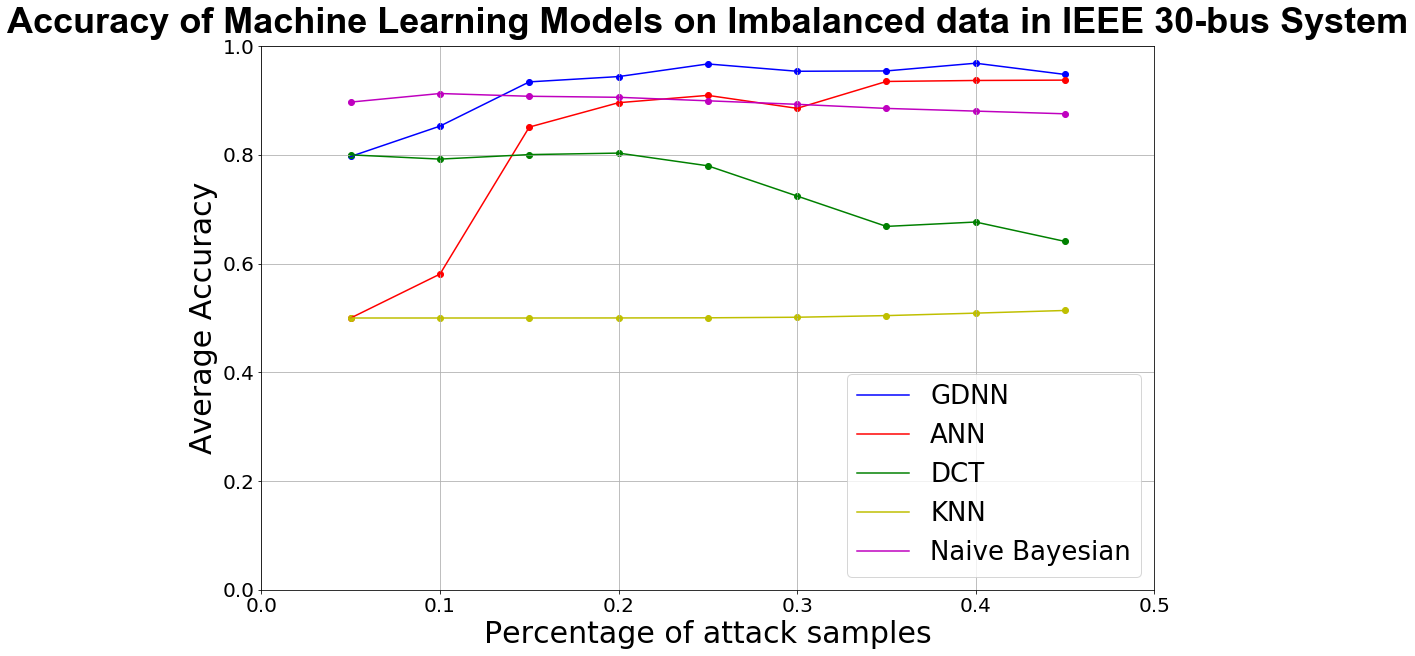

In [12]:
plt.figure(figsize=(16,10))
plt.scatter(x,gdnn_acc, color = 'b')
plt.plot(x,gdnn_acc, 'b-', label="GDNN")

plt.scatter(x,ann_acc, color = 'r')
plt.plot(x,ann_acc, 'r-', label="ANN")

plt.scatter(x,dct_acc, color = 'g')
plt.plot(x,dct_acc, 'g-', label="DCT")

plt.scatter(x,knn_acc, color = 'y')
plt.plot(x,knn_acc, 'y-', label="KNN")

plt.scatter(x,gnb_acc, color = 'm')
plt.plot(x,gnb_acc, 'm-', label="Naive Bayesian")

plt.ylabel('Average Accuracy')
plt.xlabel('Percentage of attack samples')
plt.legend(loc="lower right")
plt.axis([0,0.5,0,1])

plt.title('Accuracy of Machine Learning Models on Imbalanced data in IEEE 30-bus System', **title_font)
plt.grid()
plt.savefig('IEEE30_ImbalancedAccuracies.png')

plt.show()